In [2]:
import numpy as np 
import pandas as pd 
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm 
from ISLP import load_data 
from ISLP.models import (ModelSpec as MS, 
                         summarize, 
                         poly)

In [3]:
# *args allows any number of non-names args to abline
# *kwargs allows any number of named args (like linewidth=3)
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

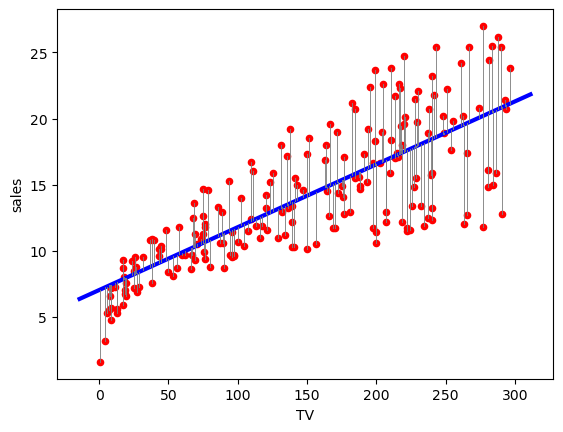

In [4]:
from pathlib import Path 
# get current working directory 
path_to_data = Path.cwd() / 'data'
file = 'Advertising.csv'
advertising = pd.read_csv(path_to_data/file)
# terms = advertising.columns.drop(['sales', 'Unnamed: 0'])
X = MS(['TV']).fit_transform(advertising)
y = advertising['sales']
model = sm.OLS(y, X)
results = model.fit()
ax = advertising.plot.scatter('TV', 'sales', c='red')
abline(ax, 
       results.params.iloc[0], 
       results.params.iloc[1], 
       'b-', 
       linewidth=3)
# Plot the residuals
y_pred = results.fittedvalues
for x, y_actual, y_hat in zip(advertising['TV'], y, y_pred):
    ax.plot([x, x], [y_actual, y_hat], color='gray', linewidth=0.7, alpha=0.9)

***Figure 3.1.***: For the advertising data, the least squares fit for the regression of sales onto TV. Each grey line segment is a residual. 

In [ ]:

import matplotlib.cm as cm 
# Let's create an array of equally spaced values around beta0, beta1
beta0 = np.linspace(results.params.iloc[0] - 2, results.params.iloc[0] + 2, 50)
beta1 = np.linspace(results.params.iloc[1] - 0.02, results.params.iloc[1] + 0.02, 50)
b0, b1 = np.meshgrid(beta0, beta1)
rss = np.zeros(b0.shape[0], b1.shape[0])


50

In [9]:
dir(results)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_get_wald_nonlinear',
 '_is_nested',
 '_transform_predict_exog',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_predi

***Figure 3.2.*** Contour and three-dimensional plots of the RSS on the
Advertising data, using sales as the response and TV as the predictor. The
red dots correspond to the least squares estimates $\beta_0$ and $\beta_1$.